In [ ]:
!pip install biopython scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from random import shuffle
def load_sequences(file_paths, window=150, stride=50):
    sequences, labels = [], []
    for label, path in file_paths.items():
        for record in SeqIO.parse(path, "fasta"):
            seq = str(record.seq).replace("*", "")
            for i in range(0, len(seq) - window + 1, stride):
                frag = seq[i:i+window]
                if len(frag) == window:
                    sequences.append((frag, label))
    shuffle(sequences)
    fragments, labels = zip(*sequences)
    return list(fragments), list(labels)
def get_kmers(seq, k=3):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]
def build_kmer_features(sequences, k=3):
    all_kmers = set()
    kmer_counts = []
    for seq in sequences:
        kmers = get_kmers(seq, k)
        count = Counter(kmers)
        kmer_counts.append(count)
        all_kmers.update(count)
    all_kmers = sorted(list(all_kmers))
    df = pd.DataFrame(0, index=np.arange(len(sequences)), columns=all_kmers)
    for i, count in enumerate(kmer_counts):
        for kmer, freq in count.items():
            df.at[i, kmer] = freq
    return df
file_paths = {
    'Zika': '/content/drive/MyDrive/sagar/Zika_200.fasta',
    'Ebola': '/content/drive/MyDrive/sagar/Ebola_200.fasta',
    'SARS_CoV_2': '/content/drive/MyDrive/sagar/SARS_CoV_2_200.fasta',
    'Influenza_A': '/content/drive/MyDrive/sagar/Influenza_A_200.fasta',
    'Influenza_B': '/content/drive/MyDrive/sagar/Influenza_B_200.fasta',
    'Tuberculosis': '/content/drive/MyDrive/sagar/Tuberculosis_200.fasta',
    'Human': '/content/drive/MyDrive/sagar/Human_200.fasta'
}
data, labels = load_sequences(file_paths, window=150, stride=50)
print(f" Augmented sequences: {len(data)}")
X = build_kmer_features(data, k=3)
y = pd.factorize(pd.Series(labels))[0]
selector = SelectKBest(mutual_info_classif, k=250)
X_selected = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42,
    verbose=True
)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"\n Final MLP Classifier Accuracy: {acc_mlp * 100:.2f}%")
print("\n MLP Classification Report:\n")
print(classification_report(y_test, y_pred_mlp))

 Augmented sequences: 9820
Iteration 1, loss = 1.00973603
Validation score: 0.829517
Iteration 2, loss = 0.38558688
Validation score: 0.919847
Iteration 3, loss = 0.23494797
Validation score: 0.942748
Iteration 4, loss = 0.16463996
Validation score: 0.963104
Iteration 5, loss = 0.12441653
Validation score: 0.964377
Iteration 6, loss = 0.09879557
Validation score: 0.970738
Iteration 7, loss = 0.08206264
Validation score: 0.973282
Iteration 8, loss = 0.06936040
Validation score: 0.973282
Iteration 9, loss = 0.05990731
Validation score: 0.977099
Iteration 10, loss = 0.05280751
Validation score: 0.980916
Iteration 11, loss = 0.04698728
Validation score: 0.983461
Iteration 12, loss = 0.04197291
Validation score: 0.986005
Iteration 13, loss = 0.03841419
Validation score: 0.984733
Iteration 14, loss = 0.03509685
Validation score: 0.986005
Iteration 15, loss = 0.03223738
Validation score: 0.987277
Iteration 16, loss = 0.02995076
Validation score: 0.986005
Iteration 17, loss = 0.02806107
Valida

 Augmented sequences: 9820
Iteration 1, loss = 1.00982181
Validation score: 0.812977
Iteration 2, loss = 0.39756881
Validation score: 0.916031
Iteration 3, loss = 0.23870944
Validation score: 0.945293
Iteration 4, loss = 0.16557076
Validation score: 0.964377
Iteration 5, loss = 0.12422446
Validation score: 0.964377
Iteration 6, loss = 0.09824445
Validation score: 0.969466
Iteration 7, loss = 0.08103320
Validation score: 0.973282
Iteration 8, loss = 0.06827314
Validation score: 0.974555
Iteration 9, loss = 0.05903749
Validation score: 0.972010
Iteration 10, loss = 0.05212651
Validation score: 0.975827
Iteration 11, loss = 0.04651009
Validation score: 0.973282
Iteration 12, loss = 0.04169805
Validation score: 0.979644
Iteration 13, loss = 0.03817370
Validation score: 0.978372
Iteration 14, loss = 0.03479658
Validation score: 0.979644
Iteration 15, loss = 0.03280963
Validation score: 0.980916
Iteration 16, loss = 0.03069284
Validation score: 0.980916
Iteration 17, loss = 0.02856280
Valida

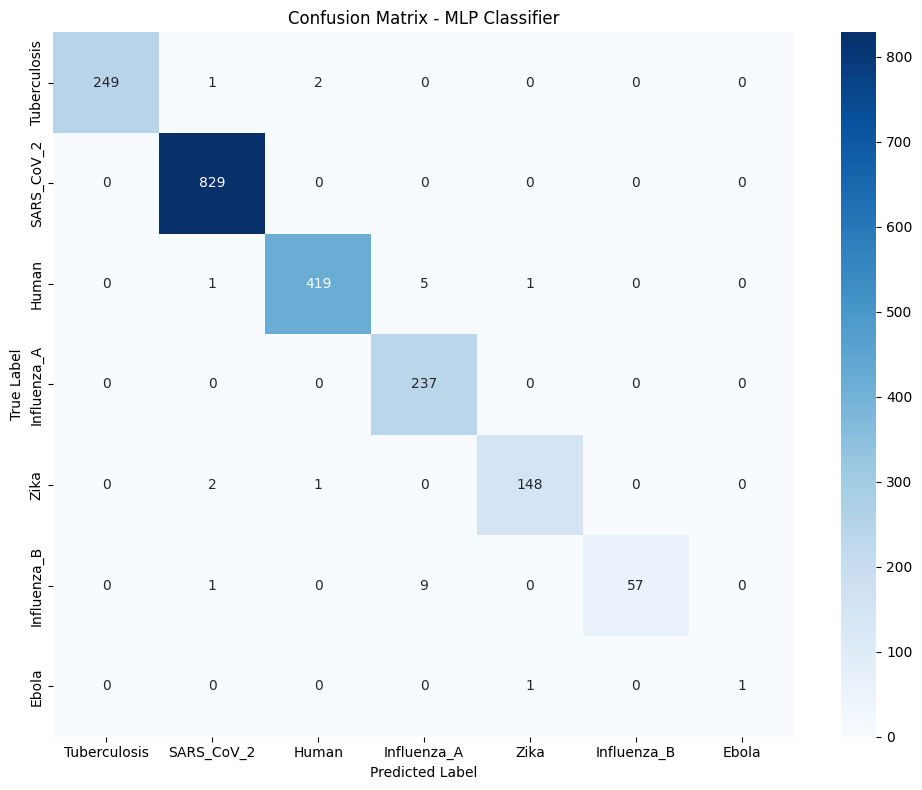

In [ ]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from random import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

def load_sequences(file_paths, window=150, stride=50):
    sequences, labels = [], []
    for label, path in file_paths.items():
        for record in SeqIO.parse(path, "fasta"):
            seq = str(record.seq).replace("*", "")
            for i in range(0, len(seq) - window + 1, stride):
                frag = seq[i:i+window]
                if len(frag) == window:
                    sequences.append((frag, label))
    shuffle(sequences)
    fragments, labels = zip(*sequences)
    return list(fragments), list(labels)

def get_kmers(seq, k=3):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

def build_kmer_features(sequences, k=3):
    all_kmers = set()
    kmer_counts = []
    for seq in sequences:
        kmers = get_kmers(seq, k)
        count = Counter(kmers)
        kmer_counts.append(count)
        all_kmers.update(count)
    all_kmers = sorted(list(all_kmers))
    df = pd.DataFrame(0, index=np.arange(len(sequences)), columns=all_kmers)
    for i, count in enumerate(kmer_counts):
        for kmer, freq in count.items():
            df.at[i, kmer] = freq
    return df

file_paths = {
    'Zika': '/content/drive/MyDrive/sagar/Zika_200.fasta',
    'Ebola': '/content/drive/MyDrive/sagar/Ebola_200.fasta',
    'SARS_CoV_2': '/content/drive/MyDrive/sagar/SARS_CoV_2_200.fasta',
    'Influenza_A': '/content/drive/MyDrive/sagar/Influenza_A_200.fasta',
    'Influenza_B': '/content/drive/MyDrive/sagar/Influenza_B_200.fasta',
    'Tuberculosis': '/content/drive/MyDrive/sagar/Tuberculosis_200.fasta',
    'Human': '/content/drive/MyDrive/sagar/Human_200.fasta'
}

# Load and process data
data, labels = load_sequences(file_paths, window=150, stride=50)
print(f" Augmented sequences: {len(data)}")
X = build_kmer_features(data, k=3)
y = pd.factorize(pd.Series(labels))[0]
class_names = pd.Series(labels).unique()

# Feature selection
selector = SelectKBest(mutual_info_classif, k=250)
X_selected = selector.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Classifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42,
    verbose=True
)

# Train and predict
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Accuracy and classification report
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"\n Final MLP Classifier Accuracy: {acc_mlp * 100:.2f}%")
print("\n MLP Classification Report:\n")
print(classification_report(y_test, y_pred_mlp, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MLP Classifier")
plt.tight_layout()
plt.show()
